# Part Two

Необхідно виконати:

1. Розв'язати диференціальне рівняння (2) та побудувати графік функції S(t)
2. Розв'язати диференціальне рівняння (3) та побудувати графік функції I(t)
3. Використовуючи рішення рівнянь (2) і (3), за допомогою рівняння (1), знайти рішення рівняння (4) (використовуйте інтерполяцію interp1d) та побудувати графік функції R(t)
4. Побудувати всі три графіки S(t), I(t) і R(t) на одній області відображення

In [41]:
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

In [1]:
alpha = 0.5
beta = 0.3
N = 1000000
S_0 = 990000
I_0 = 7000
R_0 = 3000
t_0, t_f = 0, 25

## 1

In [27]:
def dS_dt(t, S):
    return -alpha * S

In [28]:
solve_dS_dt = solve_ivp(dS_dt, (t_0, t_f), [S_0], dense_output=True)
print(solve_dS_dt)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.149e-01 ...  2.415e+01  2.500e+01]
        y: [[ 9.900e+05  9.347e+05 ...  5.677e+00  3.713e+00]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x16c1728f0>
 t_events: None
 y_events: None
     nfev: 98
     njev: 0
      nlu: 0


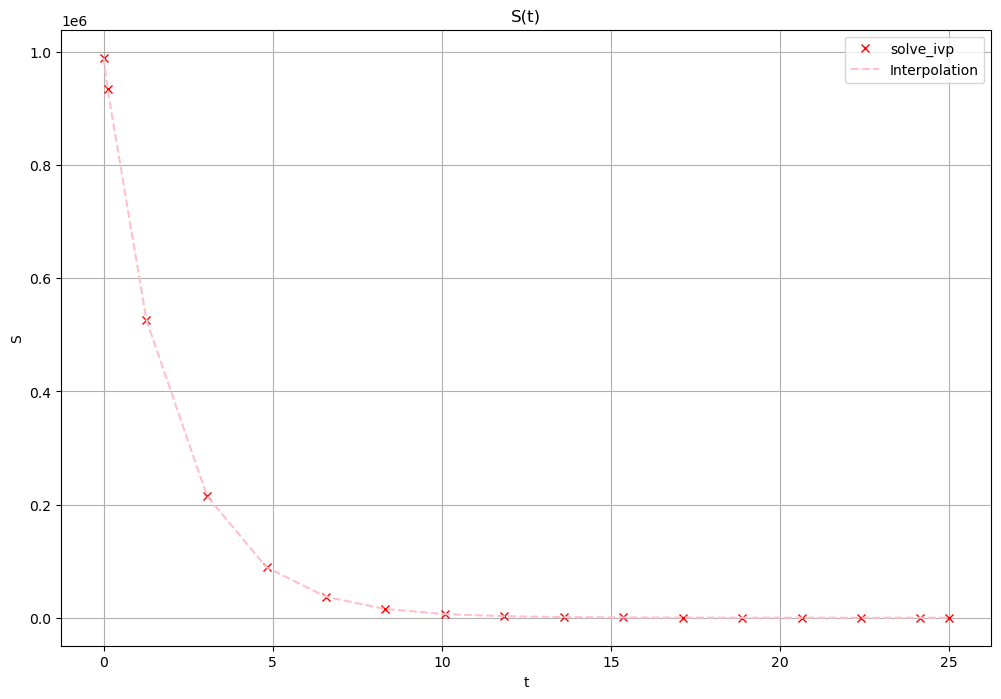

In [59]:
t, y = solve_dS_dt.t, solve_dS_dt.y[0]
z, = solve_dS_dt.sol(t)
plt.figure(figsize=(12, 8))
plt.plot(t, y, 'x', color='red', label='solve_ivp')
plt.plot(t, z, color='pink', linestyle='dashed', label='Interpolation')
plt.grid()
plt.title('S(t)')
plt.ylabel('S')
plt.xlabel('t');
plt.legend()
plt.show()

## 2

In [30]:
def dI_dt(t, I):
    return alpha * solve_dS_dt.sol(t) - beta * I 

In [32]:
solve_dI_dt = solve_ivp(dI_dt, (t_0, t_f), [I_0], dense_output=True)
print(solve_dI_dt)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.420e-02 ...  2.360e+01  2.500e+01]
        y: [[ 7.000e+03  1.396e+04 ...  2.075e+03  1.368e+03]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x16c28d330>
 t_events: None
 y_events: None
     nfev: 80
     njev: 0
      nlu: 0


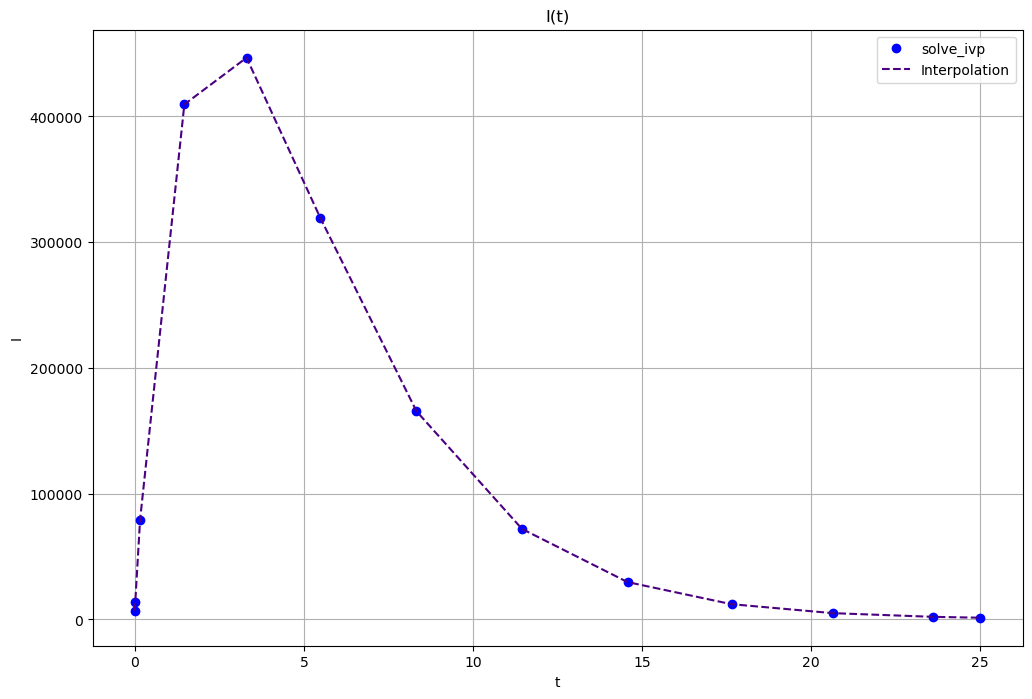

In [60]:
t, y = solve_dI_dt.t, solve_dI_dt.y[0]
z, = solve_dI_dt.sol(t)
plt.figure(figsize=(12, 8))
plt.plot(t, y, 'o', color='blue', label='solve_ivp')
plt.plot(t, z, color='indigo', linestyle='dashed', label='Interpolation')
plt.grid()
plt.title('I(t)')
plt.ylabel('I')
plt.xlabel('t');
plt.legend()
plt.show()

## 3

In [46]:
solve_dI_dt_interpolated = solve_dI_dt.sol(solve_dS_dt.t)
R_t = N - solve_dS_dt.y[0] - solve_dI_dt_interpolated[0]

R_interpolated = interp1d(solve_dS_dt.t, R_t, kind='linear')

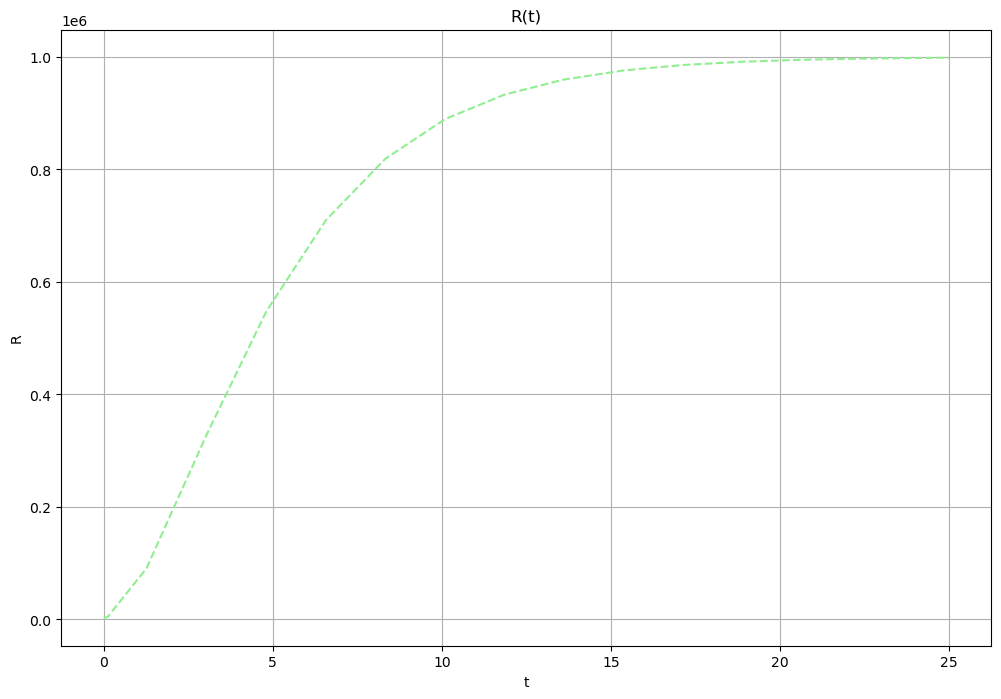

In [61]:
plt.figure(figsize=(12, 8))
plt.plot(solve_dS_dt.t, R_interpolated(solve_dS_dt.t), linestyle='dashed', color='lightgreen')
plt.grid()
plt.title('R(t)')
plt.ylabel('R')
plt.xlabel('t');
plt.show()

## 4

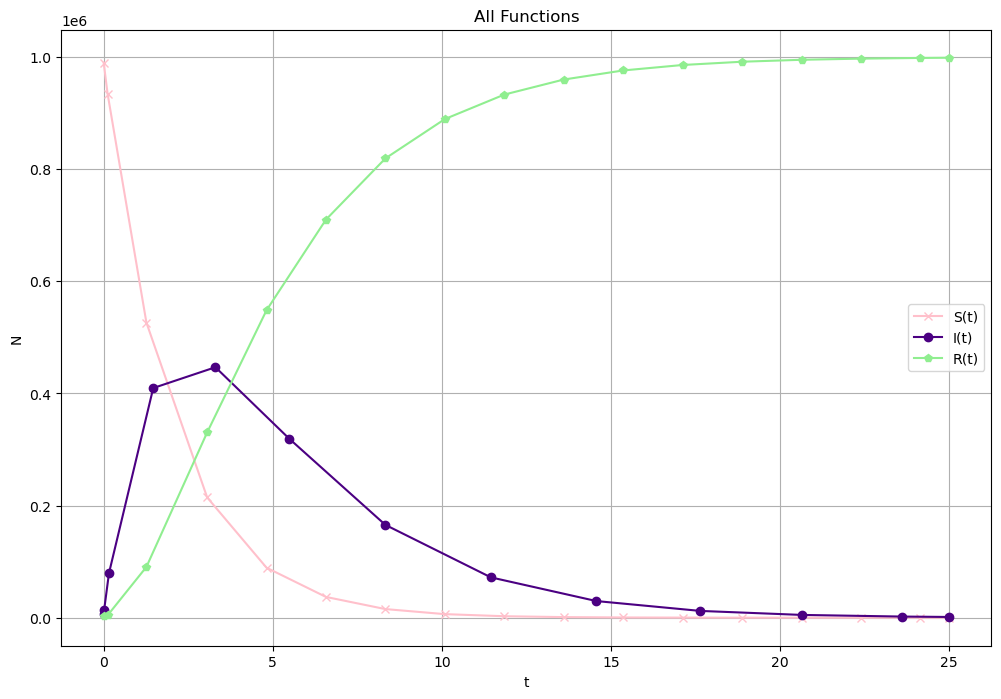

In [74]:
plt.figure(figsize=(12, 8))
plt.plot(solve_dS_dt.t, solve_dS_dt.y[0], color='pink', marker='x', label='S(t)')
plt.plot(solve_dI_dt.t, solve_dI_dt.y[0], color='indigo', marker='o', label='I(t)')
plt.plot(solve_dS_dt.t, R_interpolated(solve_dS_dt.t), color='lightgreen', marker='p', label='R(t)')
plt.legend()
plt.grid()
plt.title('All Functions')
plt.ylabel('N')
plt.xlabel('t');